# Statistical Analysis of PsyCap

In [13]:
from HelperFunctions import loadObject, dumpObject, writeDataFrameToExcel
from Definitions import EXCEL_FILES_DIR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', 20) # Show all rows

In [14]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

## Loading df_for_stat_analysis

In [15]:
df_for_stat_analysis = loadObject("df_for_stat_analysis")
df_for_stat_analysis

opc_Total_Words  opc_Total_Characters  opc_OrgPsyCapConfidence  \
0                1406                  7809                       12   
1                1233                  6354                        7   
2                1667                  9337                       13   
3                2495                 13070                       30   
4                 823                  4576                       17   
...               ...                   ...                      ...   
4532              635                  3387                        6   
4533             1406                  7880                       11   
4534             1406                  7880                       11   
4535              458                  2346                        5   
4536              458                  2346                        5   

      opc_OrgPsyCapHope  opc_OrgPsyCapOptimism  opc_OrgPsyCapResilience  \
0                    16                      9                        6   
1                    17                      4                        6   
2                    20                      3                        5   
3                    16                     11                        9   
4                     3                      3                        1   
...                 ...                    ...                      ...   
4532                  6                      4                        5   
4533                 17                      1                        4   
4534                 17                      1                        4   
4535                  5                      0                        2   
4536                  5                      0                        2   

      is13D  13dg_corresponding_LTS_finYear  opc_TotalPsyCap  \
0         1                            2007               43   
1         1                            2012               34   
2         1                            2014               41   
3         1                            2009               66   
4         1                            2011               24   
...     ...                             ...              ...   
4532      0                            2015               21   
4533      0                            2013               33   
4534      0                            2013               33   
4535      0                            2014               12   
4536      0                            2014               12   

      opc_OrgPsyCapConfidence_divByWords  opc_OrgPsyCapHope_divByWords  \
0                               0.008535                      0.011380   
1                               0.005677                      0.013788   
2                               0.007798                      0.011998   
3                               0.012024                      0.006413   
4                               0.020656                      0.003645   
...                                  ...                           ...   
4532                            0.009449                      0.009449   
4533                            0.007824                      0.012091   
4534                            0.007824                      0.012091   
4535                            0.010917                      0.010917   
4536                            0.010917                      0.010917   

      opc_OrgPsyCapOptimism_divByWords  opc_OrgPsyCapResilience_divByWords  \
0                             0.006401                            0.004267   
1                             0.003244                            0.004866   
2                             0.001800                            0.002999   
3                             0.004409                            0.003607   
4                             0.003645                            0.001215   
...                                ...                                 ...   
4532                          0.0062

In [16]:
plt.rcParams['figure.figsize'] = [15, 6]

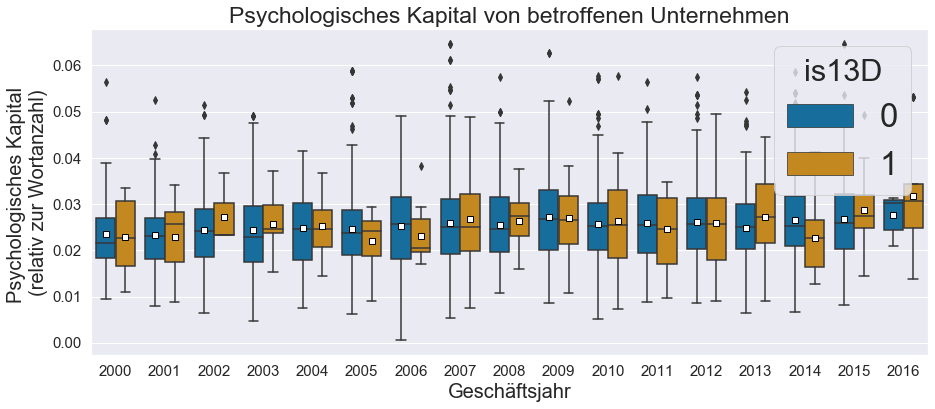

In [17]:
plot1 = sns.boxplot(y='opc_TotalPsyCap_divByWords', x='13dg_corresponding_LTS_finYear', 
                 data=df_for_stat_analysis, 
            hue = "is13D",
            showmeans = True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
                 palette="colorblind")

plot1.axes.set_title("Psychologisches Kapital von betroffenen Unternehmen",fontsize=23)
plot1.set_xlabel("Geschäftsjahr",fontsize=20)
plot1.set_ylabel("Psychologisches Kapital \n(relativ zur Wortanzahl)",fontsize=20)
plot1.tick_params(labelsize=15)


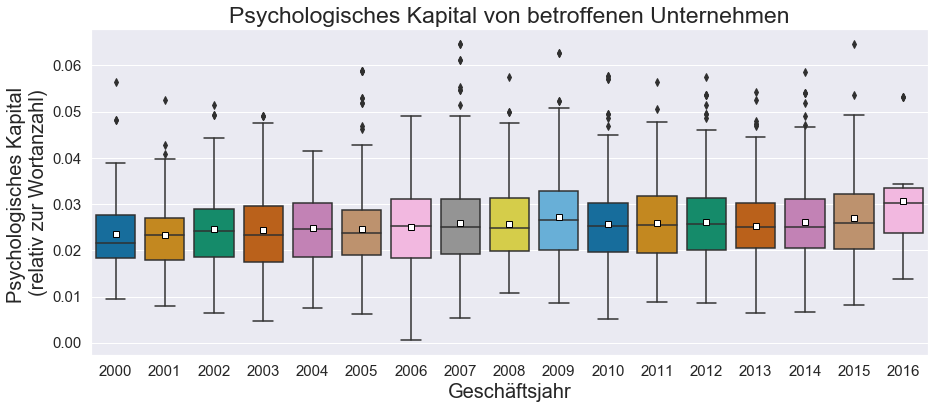

In [18]:
plot2 = sns.boxplot(y='opc_TotalPsyCap_divByWords', x='13dg_corresponding_LTS_finYear', 
                 data=df_for_stat_analysis, 
            showmeans = True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
                 palette="colorblind",
           dodge = False)

plot2.axes.set_title("Psychologisches Kapital von betroffenen Unternehmen",fontsize=23)
plot2.set_xlabel("Geschäftsjahr",fontsize=20)
plot2.set_ylabel("Psychologisches Kapital \n(relativ zur Wortanzahl)",fontsize=20)
plot2.tick_params(labelsize=15)


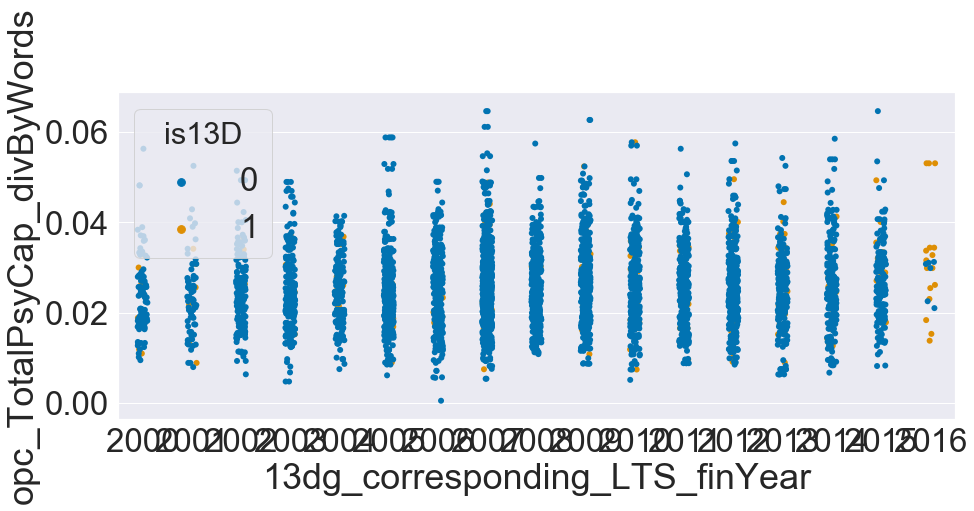

In [19]:
sns.stripplot(y='opc_TotalPsyCap_divByWords', x='13dg_corresponding_LTS_finYear', 
                data=df_for_stat_analysis, 
                hue = "is13D",
                jitter=True,
              marker='o',
              size = 6.0,
                 palette="colorblind",)

In [20]:
plt.rcParams['figure.figsize'] = [6, 6]

In [21]:
plot3 = sns.boxplot(y='opc_TotalPsyCap_divByWords', x='is13D', 
                 data=df_for_stat_analysis, 
            showmeans = True,
             meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
                 palette="colorblind",)

plot3.axes.set_title("Psychologisches Kapital \nvon betroffenen Unternehmen",fontsize=23)
plot3.set_xlabel("Investorenaktivismus",fontsize=20)
plot3.set_ylabel("Psychologisches Kapital \n(relativ zur Wortanzahl)",fontsize=20)
plot3.tick_params(labelsize=15)


In [22]:
df_for_stat_analysis.groupby('is13D')['opc_TotalPsyCap_divByWords'].describe()

count      mean       std       min       25%       50%       75%  \
is13D                                                                       
0      4233.0  0.025598  0.008904  0.000506  0.019342  0.024825  0.030870   
1       304.0  0.026034  0.008653  0.007423  0.019885  0.025518  0.031266   

            max  
is13D            
0      0.064655  
1      0.057757

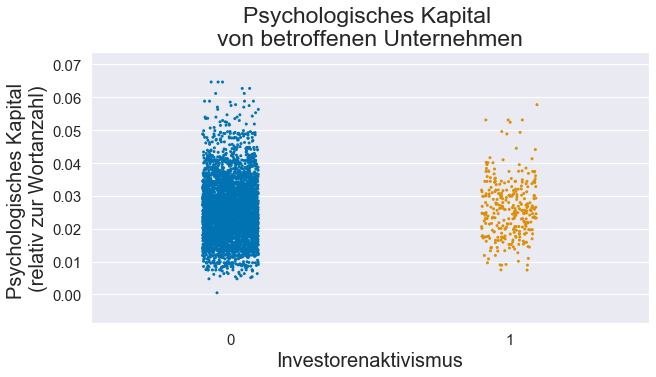

In [23]:
plt.rcParams['figure.figsize'] = [10, 5]
plot4 = sns.stripplot(y='opc_TotalPsyCap_divByWords', x='is13D', 
                data=df_for_stat_analysis, 
                jitter=True,
              marker='o',
              size = 3.0,
                 palette="colorblind",)

plot4.axes.set_title("Psychologisches Kapital \nvon betroffenen Unternehmen",fontsize=23)
plot4.set_xlabel("Investorenaktivismus",fontsize=20)
plot4.set_ylabel("Psychologisches Kapital \n(relativ zur Wortanzahl)",fontsize=20)
plot4.tick_params(labelsize=15)

## Correlation Matrix

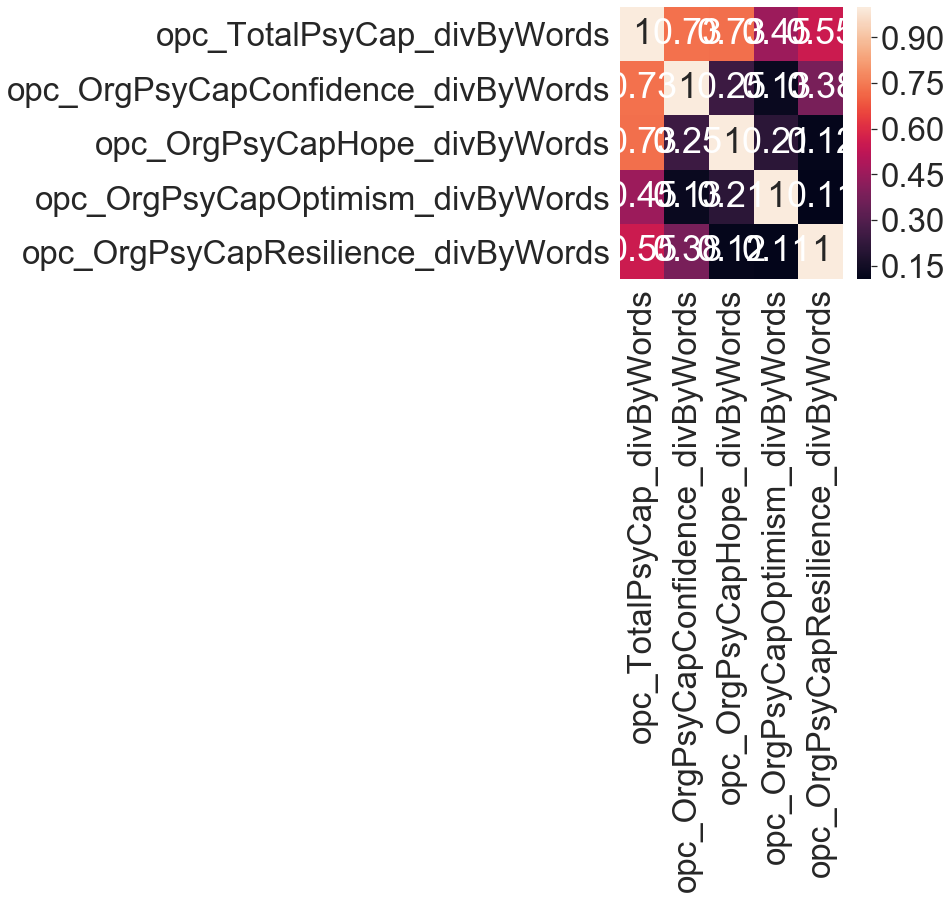

In [24]:
plt.rcParams['figure.figsize'] = [5, 5]


relevant_columns = [
    "opc_TotalPsyCap_divByWords",
    "opc_OrgPsyCapConfidence_divByWords",
    "opc_OrgPsyCapHope_divByWords",
    "opc_OrgPsyCapOptimism_divByWords",
    "opc_OrgPsyCapResilience_divByWords"
    
]
st = df_for_stat_analysis[[*relevant_columns]]
corrMatrix = st.corr()
sns.heatmap(corrMatrix, annot=True)
sns.set(font_scale=3)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

